# 1. Load CIFAR - 10 database

In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Visualize the first 36 training images

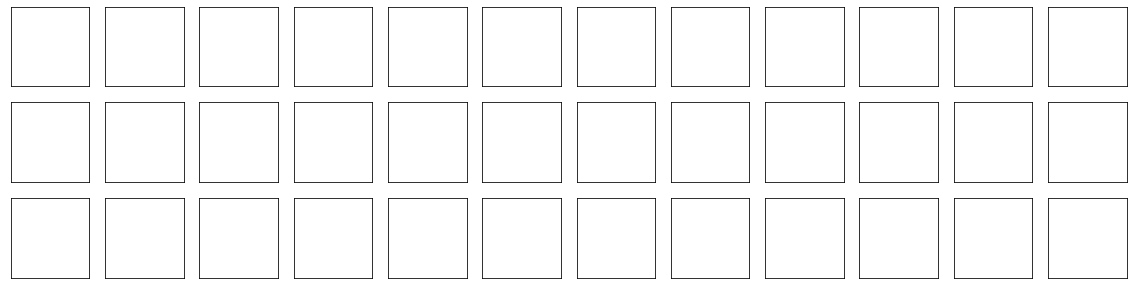

In [35]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i + 1, xticks=[],yticks=[])

# 3. Rescale the images by dividing every pixel in every image by 255

In [36]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [37]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

# 4. Break dataset into Training,  Testing, Validation sets

In [38]:
from keras.utils import np_utils
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
# break training set into training and validation set
(x_train, x_valid) = x_train[5000:],x_train[:5000]
(y_train, y_valid) = y_train[5000:],y_train[:5000]

In [30]:
# print shape of traning sets 
print('x_train shape = ', x_train.shape)

x_train shape =  (45000, 32, 32, 3)


In [31]:
# print shape of traning sets 
print('x_test shape = ', x_test.shape)

x_test shape =  (10000, 1)


In [40]:
# print number of training, validation and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'valid samples')

45000 train samples
10000 test samples
5000 valid samples


# 5. Data Augmentation - Create and configure augmented image generator

In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
# create and configure augmented image generator
datagen = ImageDataGenerator(
    width_shift_range=0.1, # randomly shift images horizontally (10%)
    height_shift_range=0.1, # randomly shift images vertically (10%)
    horizontal_flip=True  # randomly flip images horizontally
)
datagen.fit(x_train)

# 5. Define the CNN model architechure

In [45]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

In [59]:
# define the model = Vanila version model ==> params over 3,000,000
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)         

In [47]:
# complie the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

# WAY2 = General CNN

In [55]:
from keras.callbacks import ModelCheckpoint
# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,
                               save_best_only=True)
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=10, 
                           steps_per_epoch=x_train.shape[0]//32, 
                           validation_data=(x_valid,y_valid), callbacks=[checkpointer],
                           verbose=2)

Epoch 1/10
 - 30s - loss: 1.1897 - accuracy: 0.5854 - val_loss: 1.0389 - val_accuracy: 0.6300

Epoch 00001: val_loss improved from inf to 1.03895, saving model to MLP.weights.best.hdf5
Epoch 2/10
 - 31s - loss: 1.1760 - accuracy: 0.5924 - val_loss: 1.0147 - val_accuracy: 0.6478

Epoch 00002: val_loss improved from 1.03895 to 1.01468, saving model to MLP.weights.best.hdf5
Epoch 3/10
 - 31s - loss: 1.1716 - accuracy: 0.5964 - val_loss: 0.9977 - val_accuracy: 0.6582

Epoch 00003: val_loss improved from 1.01468 to 0.99769, saving model to MLP.weights.best.hdf5
Epoch 4/10
 - 28s - loss: 1.1769 - accuracy: 0.5945 - val_loss: 0.9780 - val_accuracy: 0.6558

Epoch 00004: val_loss improved from 0.99769 to 0.97796, saving model to MLP.weights.best.hdf5
Epoch 5/10
 - 32s - loss: 1.1811 - accuracy: 0.5927 - val_loss: 1.0333 - val_accuracy: 0.6488

Epoch 00005: val_loss did not improve from 0.97796
Epoch 6/10
 - 30s - loss: 1.1897 - accuracy: 0.5942 - val_loss: 0.9633 - val_accuracy: 0.6644

Epoch 0

# WAY1 = General CNN

In [ ]:


from keras.callbacks import ModelCheckpoint
# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,
                               save_best_only=True)
hist2 = model.fit(x_train, y_train, batch_size=32, epochs=10, 
                 validation_data=(x_valid,y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

# 8. Load teh model with the best classification acuracy on the validation set

In [56]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

# 9. Calculate classification accuracy on test set = 66%

In [57]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test Accuracy=',score[1])


 Test Accuracy= 0.6657999753952026
